In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [85]:
#abertura do dataset criado
df_balanceado = pd.read_csv('Df_balanceado')

In [87]:
features_x = [
    "A005012", "A018023", "A01901", "A2201", "C011", "D001", "E003", "E011", "E019",
    "J001", "J007", "P00103", "P019", "P027", "P02801", "P03201", "P03301", "P03303",
    "P034", "P035", "P039", "P03904", "P050", "P051"
]

# Definir X e Y
X = df_balanceado[features_x].apply(pd.to_numeric, errors='coerce').fillna(-1)
y = df_balanceado["target"]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3
)

# Parâmetros de treinamento
mlp = MLPClassifier(
    hidden_layer_sizes=(40,), 
    max_iter=5000,
    learning_rate='adaptive',
    activation='relu',
    solver='adam'
)

In [91]:
start = time.perf_counter()
mlp.fit(X_train, y_train)
end = time.perf_counter()

# Predições
y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# Métricas
precisao = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
acuracia = accuracy_score(y_test, y_pred)
execution_time = end - start
print(f"Tempo de execução: {execution_time:.6f} segundos")
auc = roc_auc_score(y_test, y_proba)

Tempo de execução: 7.114483 segundos


Resultados:
Precisão: 0.8726
Recall: 0.8685
F1 score: 0.8682
Acurácia: 0.8685
AUC: 0.9060



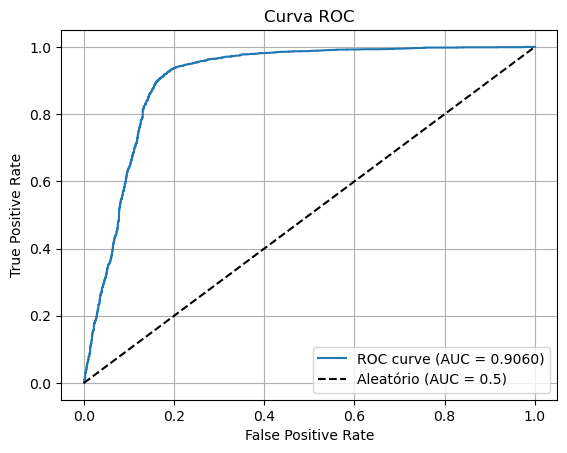

In [93]:
print("Resultados:")
print(f"Precisão: {precisao:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Acurácia: {acuracia:.4f}")
print(f"AUC: {auc:.4f}\n")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig('curva_roc.jpeg', format='jpeg', dpi=300)
plt.show()

Resultados nos dados sintéticos:
Acurácia: 0.753
Precisão: 0.6738544474393531
Recall: 0.9900990099009901
F1 score: 0.8019246190858059


C:\Users\Pichau\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


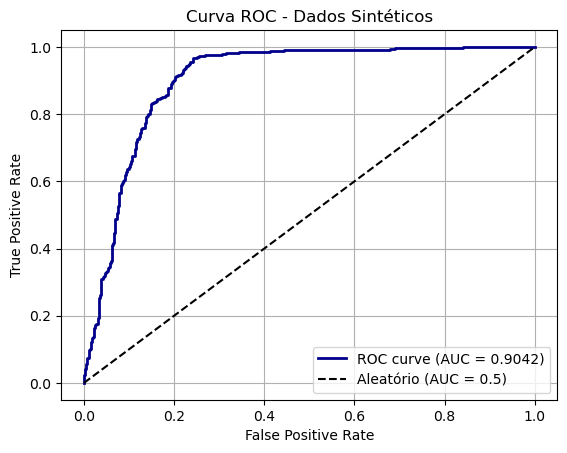

In [37]:
# Gerar novos dados adicionando ruído
n_samples_novos = 1000  # quantidade de novos dados
noise_strength = 0.05   # força do ruído (5%)

# Pegando amostras aleatórias de X_train
indices = np.random.choice(X_train.shape[0], n_samples_novos)
X_sintetico = X_train[indices] + np.random.normal(0, noise_strength, size=(n_samples_novos, X_train.shape[1]))

# Os labels podem ser mantidos os mesmos
y_sintetico = y_train.iloc[indices].reset_index(drop=True)

# Escolher o método (ex: método 1 - ruído)
X_teste_novo, y_teste_novo = X_sintetico, y_sintetico

# Normalizar como o modelo foi treinado
X_teste_novo_scaled = scaler.transform(X_teste_novo)

# Prever no novo conjunto
y_pred_novo = mlp.predict(X_teste_novo_scaled)

# Avaliar
print("Resultados nos dados sintéticos:")
print("Acurácia:", accuracy_score(y_teste_novo, y_pred_novo))
print("Precisão:", precision_score(y_teste_novo, y_pred_novo))
print("Recall:", recall_score(y_teste_novo, y_pred_novo))
print("F1 score:", f1_score(y_teste_novo, y_pred_novo))

# Curva ROC
fpr, tpr, _ = roc_curve(y_teste_novo, mlp.predict_proba(X_teste_novo_scaled)[:,1])
auc = roc_auc_score(y_teste_novo, mlp.predict_proba(X_teste_novo_scaled)[:,1])

# Plot da Curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})", color='darkblue', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Dados Sintéticos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()